In [4]:
from sympy import *
import numpy as np
from matplotlib import pyplot as plt
import time

%matplotlib inline

In [9]:
def compute(function, learning_rate = 0.1, maxIterations = 10000, threshold = 1/1000000, 
            cost_delta_threshold = 1/1000000, gradient_threshold = 1/1000000, cost_threshold = None):
    t0 = time.perf_counter()
    x = Symbol('x')
    y = function
    # First derivative with respect to x
    yprime = y.diff(x)

    alpha = learning_rate
    plot = True
    iterationsMax = maxIterations

    theta = np.random.rand() * 100
    theta2 = 0
    check = 0
    iterations = 0
    #threshold = 1/1000000
    maxDivergence = 50
    yval = y.subs(x, theta).evalf() # value of cost function
    #cost_delta_threshold = 1/1000000
    #gradient_threshold = 1/1000000

    while True:
        theta2 = theta - alpha*N(yprime.subs(x,theta)).evalf()
        yvalprime = y.subs(x, theta2).evalf()
        gradient = yprime.subs(x, theta).evalf()
        iterations += 1

        if iterations > iterationsMax: # iteration check
            print("Too much iterations")
            break

        if theta < theta2: # diversion check
            print("The value of theta is diverging")
            check += 1
            if check > maxDivergence:
                print("Too much iterations (%s), the value of theta is diverging"%maxDivergence)
                print("Please choose a smaller alpha and, or check that the function is indeed convex")
                plot = False
                break

        if abs(theta - theta2) < threshold: # theta drop threshold check
            print("Theta threshold reached. Theta: {}".format(theta2))
            break

        if yvalprime == 0: # cost function == 0 check
            print("Cost function = 0.")
            break
            
        if abs(yval - yvalprime) < cost_delta_threshold: # cost function delta check
            print("Cost function decrease theshold reached.")
            break
        
#         if gradient < gradient_threshold: # gradient threshold check
#             print("Gradient decrease threshold reached.")
#             break
        
        if cost_threshold != None and yvalprime < cost_threshold: # Cost function threshold.
            print("Cost function is less than the desired value.")
            break
        
        yval = yvalprime
        theta = theta2

    if plot:
        print("Number of iterations:",iterations,"value of theta:",theta2,sep=" ")
        plt.plot(theta,N(y.subs(x,theta)).evalf(),marker='o',color='r')
        space = np.linspace(-5,5,100)
        data = np.array([N(y.subs(x,value)) for value in space])
        plt.plot(space, data)
        plt.show()
        print("Time elapsed: {} seconds".format(time.perf_counter() - t0))

In [10]:
x = Symbol('x')
function = (x + 2)**2 -5
function1 = (x)**4 - 6*(x)**2 + 4*x + 12
function2 = (x - 2)**2 + 5
function3 = (5 / x**2)

Cost function decrease theshold reached.
Number of iterations: 46 value of theta: -1.99869518973169


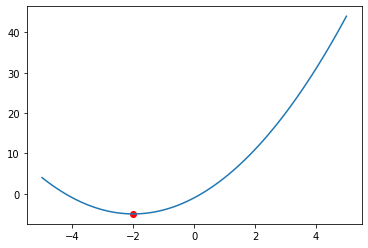

Time elapsed: 0.34702859199978775 seconds


In [11]:
compute(function)

In [12]:
compute(function1)

The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The value of theta is diverging
The valu

Cost function decrease theshold reached.
Number of iterations: 2902 value of theta: 1.53821833097518


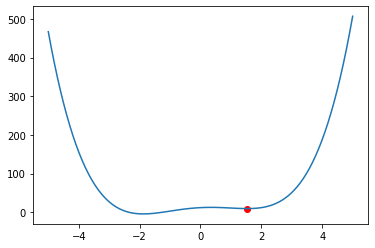

Time elapsed: 8.792936290999933 seconds


In [16]:
compute(function1, learning_rate = 0.0001)

Cost function decrease theshold reached.
Number of iterations: 435 value of theta: 2.00487959868768


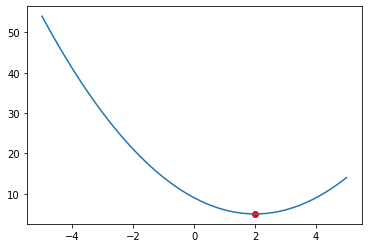

Time elapsed: 1.0712549630002286 seconds


In [14]:
compute(function2, learning_rate = 0.01)

The value of theta is diverging
Theta threshold reached. Theta: 41.3352306576584
Number of iterations: 1 value of theta: 41.3352306576584


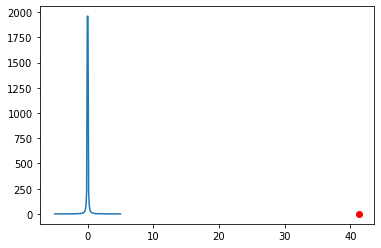

Time elapsed: 0.33865430800005925 seconds


In [15]:
compute(function3, learning_rate = 0.001)